In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [465]:
def compute_cost(x, y, theta):
  m = len(x)

  # calculating Y'; this will change as w changes
  predictions = x.dot(theta)

  # Y' - y
  errors = np.subtract(predictions, y)

  # (Y' - y)^2
  sqr_errors = np.square(errors)

  # the summation and multiplication steps of loss formula
  L = 1/(2*m) * np.sum(sqr_errors)

  return L

In [466]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lmbda, iterations):
  m = len(y_train)
  cost_history_train = np.zeros(iterations)
  cost_history_val = np.zeros(iterations)

  for i in range(iterations):
    # Y'
    predictions = x_train.dot(theta) # number of variables in x must match number of thetas

    # Y' - y
    errors = np.subtract(predictions, y_train)

    # dL/dw; performs (Y' - y)*Xn summation and then divides by m
    sum_delta = (1/m)*x_train.transpose().dot(errors)

    # regularization (theta 0 should not have a penalty added)
    reg_theta = theta
    reg_theta[0] = 0.0
    sum_delta += (lmbda/m)*reg_theta

    # w(t+1) = w(t) - a*dL/dw
    theta -= alpha*sum_delta

    # store cost of current theta values
    cost_history_train[i] = compute_cost(x_train, y_train, theta)
    cost_history_val[i] = compute_cost(x_val, y_val, theta)

  return theta, cost_history_train, cost_history_val

In [467]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(url))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Problem 3a: Normalized

In [468]:
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# apply scaler to the above variables
housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,12250000,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,12250000,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,12215000,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,11410000,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [469]:
# split dataset into training and validation sets
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# ground truths
y_train = df_train[['price']].to_numpy()
m = len(y_train)
y_train = y_train.reshape((m,))

y_val = df_test[['price']].to_numpy()
n = len(y_val)
y_val = y_val.reshape((n,))

# explanatory variables
x0_train = np.ones((m,1))
x_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_train = np.hstack((x0_train, x_train))

x0_val = np.ones((n,1))
x_val = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_val = np.hstack((x0_val, x_val))

In [470]:
theta = np.zeros(6)
iterations = 3500
alpha = 0.02
lmbda = 0.01

theta, cost_history_train, cost_history_val = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lmbda, iterations)
print(f'thetas = {theta}')
print(f'cost history of training set = {cost_history_train}')
print(f'cost history of validation set = {cost_history_val}')

thetas = [4.70374034e+03 6.13943398e+06 5.32621916e+06 2.51501424e+06
 1.59172274e+06 1.36516389e+06]
cost history of training set = [1.25857166e+13 1.24072612e+13 1.22226254e+13 ... 1.04006114e+12
 1.04005208e+12 1.04004303e+12]
cost history of validation set = [1.19485929e+13 1.17778431e+13 1.16010437e+13 ... 9.48721973e+11
 9.48732955e+11 9.48743935e+11]


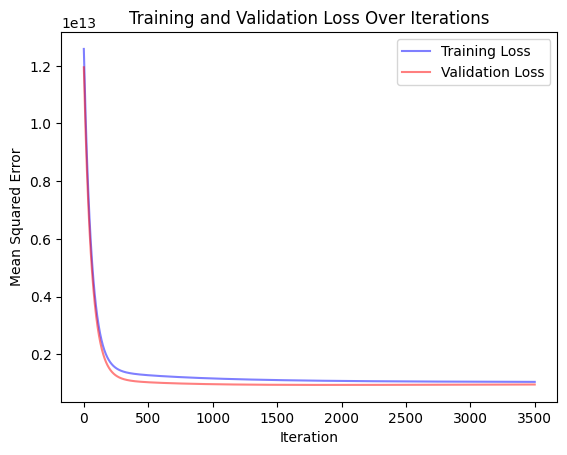

In [471]:
plt.plot(cost_history_train, label="Training Loss", color='blue', alpha=0.5)
plt.plot(cost_history_val, label="Validation Loss", color='red', alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# Problem 3a: Standardized

In [472]:
# redoing earlier process with standard scaler instead
housing = pd.DataFrame(pd.read_csv(url))

scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,yes,furnished
1,12250000,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,no,furnished
2,12250000,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,yes,semi-furnished
3,12215000,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,yes,furnished
4,11410000,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,no,furnished


In [473]:
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train[['price']].to_numpy()
m = len(y_train)
y_train = y_train.reshape((m,))

y_val = df_test[['price']].to_numpy()
n = len(y_val)
y_val = y_val.reshape((n,))

x0_train = np.ones((m,1))
x_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_train = np.hstack((x0_train, x_train))

x0_val = np.ones((n,1))
x_val = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_val = np.hstack((x0_val, x_val))

In [474]:
theta = np.zeros(6)
iterations = 3500
alpha = 0.02
lmbda = 0.01

theta, cost_history_train, cost_history_val = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lmbda, iterations)
print(f'thetas = {theta}')
print(f'cost history of training set = {cost_history_train}')
print(f'cost history of validation set = {cost_history_val}')

thetas = [  93161.89628399  647046.90944957 -181329.08852904  716232.36897907
  606131.67699369  542625.17469283]
cost history of training set = [1.27097777e+13 1.26504657e+13 1.25867262e+13 ... 1.16624792e+13
 1.16624792e+13 1.16624792e+13]
cost history of validation set = [1.20779848e+13 1.20320493e+13 1.19819937e+13 ... 1.20735909e+13
 1.20735909e+13 1.20735909e+13]


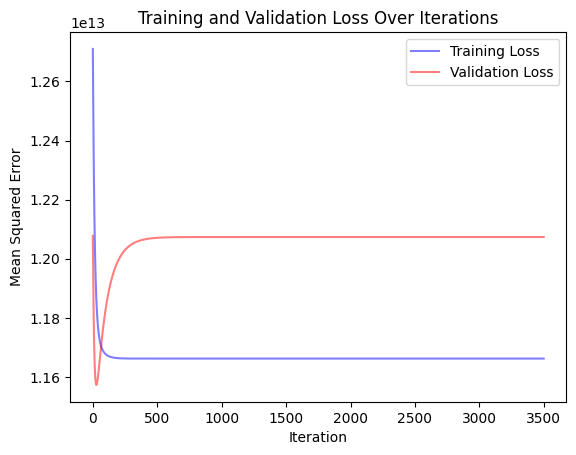

In [475]:
plt.plot(cost_history_train, label="Training Loss", color='blue', alpha=0.5)
plt.plot(cost_history_val, label="Validation Loss", color='red', alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# Problem 3b

In [476]:
housing = pd.DataFrame(pd.read_csv(url))

# variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# function to map yes/no to 1/0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# apply function to each variable in the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Problem 3b: Normalized

In [477]:
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,furnished
1,12250000,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,furnished
2,12250000,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,semi-furnished
3,12215000,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,furnished
4,11410000,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,furnished


In [478]:
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train[['price']].to_numpy()
m = len(y_train)
y_train = y_train.reshape((m,))

y_val = df_test[['price']].to_numpy()
n = len(y_val)
y_val = y_val.reshape((n,))

x0_train = np.ones((m,1))
x_train = df_train[num_vars].to_numpy()
x_train = np.hstack((x0_train, x_train))

x0_val = np.ones((n,1))
x_val = df_test[num_vars].to_numpy()
x_val = np.hstack((x0_val, x_val))

In [479]:
theta = np.zeros(12)
iterations = 3500
alpha = 0.02
lmbda = 0.01

theta, cost_history_train, cost_history_val = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lmbda, iterations)
print(f'thetas = {theta}')
print(f'cost history of training set = {cost_history_train}')
print(f'cost history of validation set = {cost_history_val}')

thetas = [2.33901092e+03 3.22992353e+06 2.81545018e+06 2.71388912e+06
 1.21135015e+06 1.50761274e+06 3.95861131e+05 4.04421741e+05
 9.77879385e+05 9.62422125e+05 9.06876090e+05 5.92499516e+05]
cost history of training set = [1.20395648e+13 1.13770313e+13 1.07461312e+13 ... 6.79310743e+11
 6.79302958e+11 6.79295179e+11]
cost history of validation set = [1.14042040e+13 1.07510747e+13 1.01300537e+13 ... 6.63776017e+11
 6.63777567e+11 6.63779120e+11]


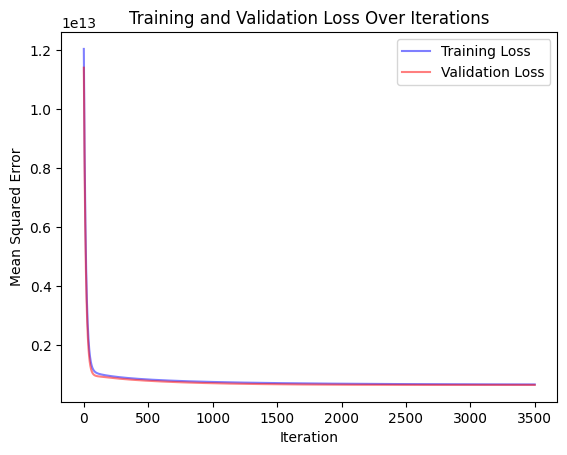

In [480]:
plt.plot(cost_history_train, label="Training Loss", color='blue', alpha=0.5)
plt.plot(cost_history_val, label="Validation Loss", color='red', alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# Problem 3b: Standardized

In [481]:
housing = pd.DataFrame(pd.read_csv(url))

# variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# function to map yes/no to 1/0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# apply function to each variable in the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [482]:
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,furnished
1,12250000,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,furnished
2,12250000,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,semi-furnished
3,12215000,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,furnished
4,11410000,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,furnished


In [483]:
np.random.seed(1)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train[['price']].to_numpy()
m = len(y_train)
y_train = y_train.reshape((m,))

y_val = df_test[['price']].to_numpy()
n = len(y_val)
y_val = y_val.reshape((n,))

x0_train = np.ones((m,1))
x_train = df_train[num_vars].to_numpy()
x_train = np.hstack((x0_train, x_train))

x0_val = np.ones((n,1))
x_val = df_test[num_vars].to_numpy()
x_val = np.hstack((x0_val, x_val))

In [484]:
theta = np.zeros(12)
iterations = 3500
alpha = 0.02
lmbda = 0.01

theta, cost_history_train, cost_history_val = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lmbda, iterations)
print(f'thetas = {theta}')
print(f'cost history of training set = {cost_history_train}')
print(f'cost history of validation set = {cost_history_val}')

thetas = [  93018.22162113  494661.21072319 -218074.55633307  661143.85049341
  599745.11347204  216257.05380236   52509.57442535  288138.8545383
  315649.83785216  194932.00918761  487081.28170871  219941.34228234]
cost history of training set = [1.26796540e+13 1.25938738e+13 1.25069400e+13 ... 1.14833883e+13
 1.14833883e+13 1.14833883e+13]
cost history of validation set = [1.20431183e+13 1.19665015e+13 1.18896957e+13 ... 1.20307816e+13
 1.20307816e+13 1.20307816e+13]


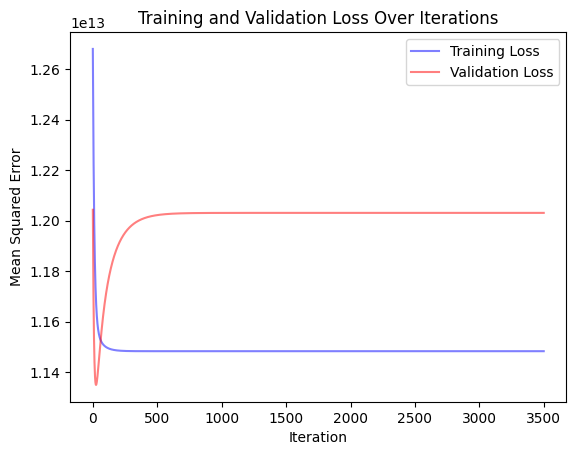

In [485]:
plt.plot(cost_history_train, label="Training Loss", color='blue', alpha=0.5)
plt.plot(cost_history_val, label="Validation Loss", color='red', alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()